In [2]:
import os
import pickle

path_to_datasets = "/home/meow/scripts/hmi/maximal_correlation_weighting/datasets/cifar-100-python"
path_to_store = "/home/meow/scripts/hmi/datasets"
dataset_path="/home/meow/scripts/hmi/datasets/cifar-100-python"
if not os.path.exists(path_to_store):
  os.mkdir(path_to_store)
  os.mkdir(path_to_store+"/cifar-100-python/")

for filename in os.listdir(path_to_datasets):
    if filename.endswith(".p"):
        with open(os.path.join(path_to_datasets, filename), "rb") as f:
            data = pickle.load(f, encoding='bytes')
            with open(os.path.join(dataset_path, filename), "wb") as out_f:
                pickle.dump(data, out_f)


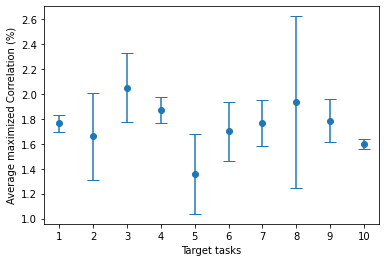

In [2]:
import matplotlib.pyplot as plt
import numpy as np
L1 = [0.01669963449239731, 0.012866921722888947, 0.017029959708452225, 0.01989831030368805, 0.01808636635541916, 0.013957108370959759, 0.016024764627218246, 0.013481841422617435, 0.017469147220253944, 0.016366083174943924]
L2 = [0.0181303471326828, 0.015631437301635742, 0.020631184801459312, 0.018841102719306946, 0.011690248735249043, 0.0197617094963789, 0.020228186622262, 0.015471586026251316, 0.015977095812559128, 0.01611137017607689]
L3 = [0.01808777265250683, 0.021261870861053467, 0.023839835077524185, 0.017401769757270813, 0.010946323163807392, 0.017314305528998375, 0.016703806817531586, 0.02903098799288273, 0.020107058808207512, 0.01544492319226265]
# Calculate L4
L4 = [sum(x)/len(x)*100 for x in zip(L1, L2, L3)]

# Calculate std-dev of L4
std_dev_L4 = [np.std([x[i] for x in [L1, L2, L3]])*100 for i in range(len(L4))]

# Plot L4 with error bars
plt.errorbar(x=range(len(L4)), y=L4, yerr=std_dev_L4,fmt='o', capsize=6)
plt.xticks(range(len(L4)), range(1, len(L4)+1))
plt.xlabel("Target tasks")
plt.ylabel("Average maximized Correlation (%)")
plt.show()
